In [12]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

In [15]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

from src.sentiment_analysis import FinancialNewsEDA


ImportError: cannot import name 'FinancialNewsEDA' from 'src.sentiment_analysis' (c:\Users\mike\Documents\Kifiya_AIM\week1\stock-price-sentiment-analysis\src\sentiment_analysis.py)

In [7]:
news_data = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=["date"], date_parser=lambda x: pd.to_datetime(x, utc=True))

C:\Users\mike\AppData\Local\Temp\ipykernel_10168\2596891938.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  news_data = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=["date"], date_parser=lambda x: pd.to_datetime(x, utc=True))


In [ ]:
print(news_data.head(7))

# Data types
print(news_data.dtypes)

# Info
print(news_data.info())

# Describe summary statistics
print(news_data.describe())

#Check for missing values
print(news_data.isna().sum())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   
5           5  CFRA Maintains Hold on Agilent Technologies, L...   
6           6  UBS Maintains Neutral on Agilent Technologies,...   

                                                 url                publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...        Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...        Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...               Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...               Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b.

In [4]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

news_data["Sentiment"] = news_data["headline"].apply(get_sentiment)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: Sentiment, dtype: float64
5133
count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Sentiment, dtype: float64
Sentiment
0.000000    934928
0.500000     86313
0.250000     31492
0.136364     16654
0.100000     15469
Name: count, dtype: int64
                                               headline  Sentiment
819            Best Buy: Analysts' Upgrades, Downgrades        1.0
1343    OneMove(TM) Records its Best Month Ever in July        1.0
1382  Klondike Silver Completes Underground Drilling...        1.0
1849                             10 Best Stocks Of 2017        1.0
2270          Miners: The Best Way To Play A Rate Hike?        1.0
                                               headline  Sentiment
2552  Tech, Semiconductors Among Worst Performers As...       -1.0
3175               I've j

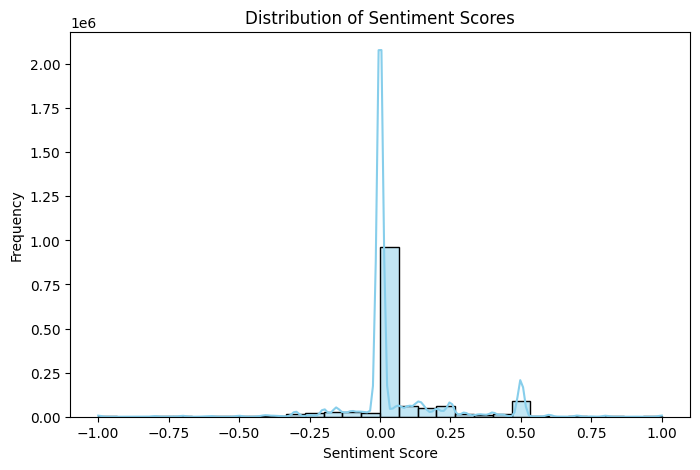

In [5]:
# First few rows
print(news_data["Sentiment"].head(7))

# unique values
print(news_data["Sentiment"].nunique())

# Summary statistics
print(news_data["Sentiment"].describe())

# Value counts
print(news_data["Sentiment"].value_counts().head())

# Headlines with the highest sentiment values
print(news_data[["headline", "Sentiment"]].nlargest(5, "Sentiment"))

# Headlines with the lowest sentiment values
print(news_data[["headline", "Sentiment"]].nsmallest(5, "Sentiment"))

# Distribution plot of Sentiment scores
plt.figure(figsize=(8, 5))
sns.histplot(news_data['Sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


date_only
2009-02-14    1
2009-04-27    2
2009-04-29    1
2009-05-22    1
2009-05-27    6
dtype: int64


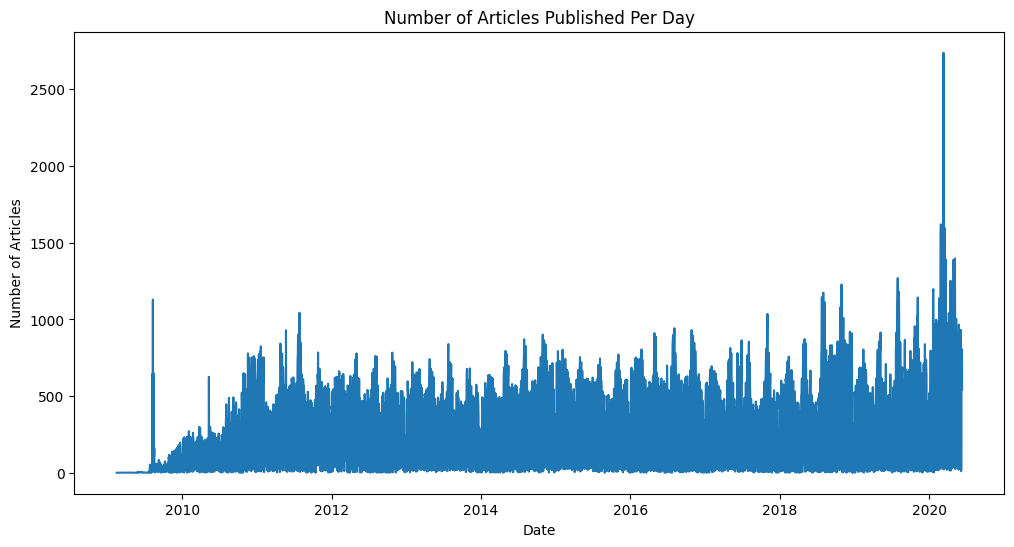

In [ ]:
# Analyzing publication date trends over time

# Create a date-only column for analyzing trends over time
news_data['date_only'] = news_data['date'].dt.date

# Count number of articles per day
articles_per_day = news_data.groupby('date_only').size()

# Show first few rows
print(articles_per_day.head())

# Visualize Publication Frequency Over Time

plt.figure(figsize=(12,6))
articles_per_day.plot()
plt.title('Number of Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


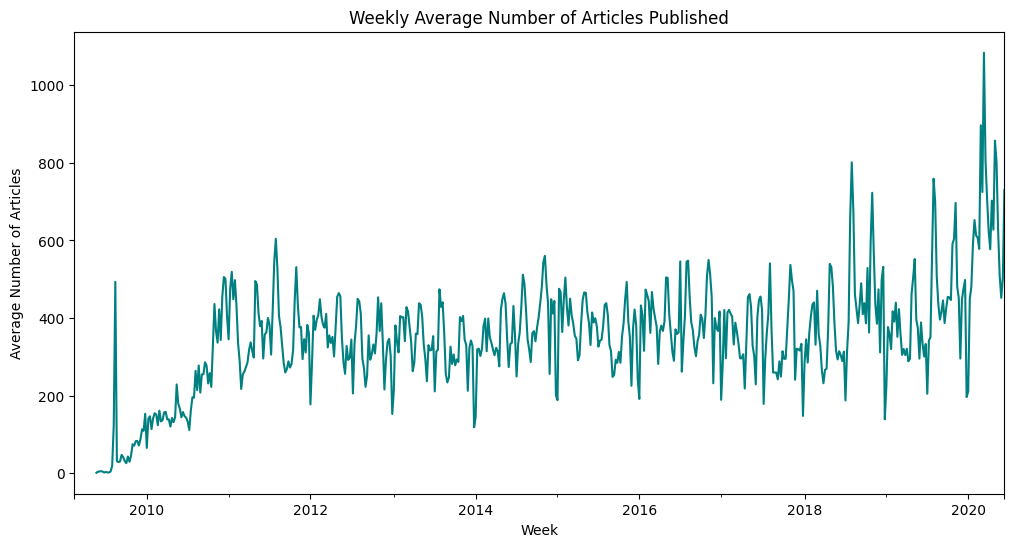

In [ ]:
# Resampling the Data to smooth out the plot and view weekly publications overtime
articles_per_day.index = pd.to_datetime(articles_per_day.index)

# Weekly average publication frequency
weekly_articles = articles_per_day.resample('W').mean()

plt.figure(figsize=(12, 6))
weekly_articles.plot(color='teal')

plt.title('Weekly Average Number of Articles Published')
plt.xlabel('Week')
plt.ylabel('Average Number of Articles')
plt.show()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


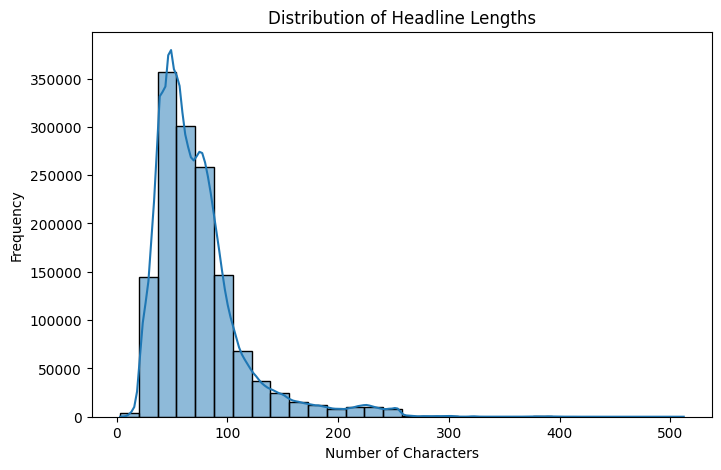

In [6]:
# Add a column for headline lengths
news_data['headline_length'] = news_data['headline'].apply(len)

# Basic statistics
print(news_data['headline_length'].describe())

# Visualize headline length distribution

plt.figure(figsize=(8,5))
sns.histplot(news_data['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Publisher counts
publisher_counts = news_data['publisher'].value_counts()

# Top publishers
top_publishers = publisher_counts.head(10)
print(top_publishers)

# Extract domain from email addresses
news_data['publisher_domain'] = news_data['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else 'No Email')

# Show first few rows
print(news_data[['publisher', 'publisher_domain']].head())

domain_counts = news_data['publisher_domain'].value_counts()
print(domain_counts)



publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64
           publisher publisher_domain
0  Benzinga Insights         No Email
1  Benzinga Insights         No Email
2         Lisa Levin         No Email
3         Lisa Levin         No Email
4         Vick Meyer         No Email
publisher_domain
No Email                  1399240
benzinga.com                 7937
gmail.com                     139
andyswan.com                    5
investdiva.com                  2
tothetick.com                   2
eosdetroit.io                   1
forextraininggroup.com          1
stockmetrix.net                 1
Name: count, dtype: int64


In [ ]:
#Text analysis  (Topic modelling)

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to get common words
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # top 20 keywords
X = vectorizer.fit_transform(news_data['headline'])

# Get keywords
keywords = vectorizer.get_feature_names_out()
print("Top Keywords:", keywords)


Top Keywords: ['announces' 'benzinga' 'buy' 'downgrades' 'earnings' 'eps' 'est' 'market'
 'mid' 'price' 'pt' 'raises' 'reports' 'sales' 'shares' 'stocks' 'trading'
 'update' 'vs' 'week']


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock  Sentiment  headline_length   date_only  \
0 2020-06-05 14:30:54+00:00     A        0.0               39  

In [ ]:
# Sort by date (newest first) and reset index
news_data = news_data.sort_values(by='date').reset_index(drop=True)

# Export analyzed and cleaned data
news_data.to_csv('../data/news_data.csv', index=False)

